In [1]:
#Social_Networks_Ads.csv

**Importing the libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Importing the dataset**

In [3]:
df = pd.read_csv('Social_Network_Ads.csv')
df = df.iloc[:, 2:]

In [4]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [5]:
df['Purchased'].unique()

array([0, 1], dtype=int64)

In [6]:
df.shape

(400, 3)

In [7]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(367, 3)

In [10]:
df.describe()

,Age,EstimatedSalary,Purchased
count,367.000000,367.000000,367.000000
mean,37.722071,70719.346049,0.376022
std,10.681383,34772.173908,0.485047
min,18.000000,15000.000000,0.000000
25%,29.500000,43000.000000,0.000000
50%,37.000000,71000.000000,0.000000
75%,46.000000,89000.000000,1.000000
max,60.000000,150000.000000,1.000000


### Outlier

In [11]:
# Age Column
iqr = df['Age'].quantile(0.75) - df['Age'].quantile(0.25)
upper_threshold = df['Age'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df['Age'].quantile(0.25) - (1.5 * iqr)
print(lower_threshold)
print(upper_threshold)

4.75
70.75


In [12]:
# EstimatedSalary Column
iqr = df['EstimatedSalary'].quantile(0.75) - df['EstimatedSalary'].quantile(0.25)
upper_threshold = df['EstimatedSalary'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df['EstimatedSalary'].quantile(0.25) - (1.5 * iqr)
print(lower_threshold)
print(upper_threshold)

-26000.0
158000.0


There is no outlier in two columns 'Age' and 'EstimatedSalary'.

### EDA

In [13]:
df.corr()

,Age,EstimatedSalary,Purchased
Age,1.000000,0.167771,0.626164
EstimatedSalary,0.167771,1.000000,0.375624
Purchased,0.626164,0.375624,1.000000


Text(0, 0.5, 'EstimatedSalary')

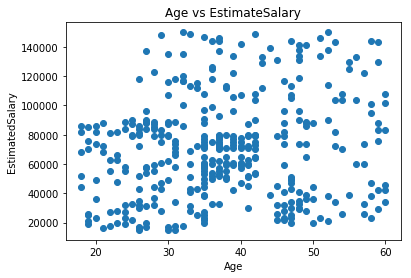

In [14]:
plt.scatter(df['Age'], df['EstimatedSalary'])
plt.title('Age vs EstimateSalary')
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')

There is no Linear relationship between 'Age' and 'EstimatedSalary'. So, we have to use both the columns for the model.

In [15]:
# Seperating as Features and Target
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

**Splitting the dataset into the Training set and Test set**

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

**Feature Scaling**

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(x_train)
sc.transform(x_test)

array([[-1.81988405,  0.36832348],
       [ 1.52319597, -0.87466316],
       [-0.91634891,  0.51285681],
       [-0.28387431, -0.12308984],
       [-0.01281377, -0.29652984],
       [ 0.16789326,  0.25269682],
       [ 0.16789326, -0.35434317],
       [-0.28387431,  0.05035016],
       [-1.72953053, -1.25044982],
       [-0.28387431, -0.73012983],
       [-0.8259954 ,  0.31051015],
       [ 1.70390299, -0.26762317],
       [ 0.34860028,  0.59957681],
       [ 0.61966083, -1.07700982],
       [-0.10316728,  0.16597682],
       [-0.73564188,  0.31051015],
       [-0.10316728,  1.95819012],
       [-0.01281377, -0.12308984],
       [-0.46458134, -1.10591649],
       [ 0.34860028, -0.44106317],
       [-0.10316728,  0.22379015],
       [ 1.16178191,  2.21835011],
       [ 0.71001434,  0.77301681],
       [-0.28387431, -0.4121565 ],
       [-0.01281377, -0.2387165 ],
       [ 0.07753974,  0.22379015],
       [-0.46458134, -1.19263648],
       [-1.63917702,  0.36832348],
       [ 1.70390299,

**Fitting K-NN to the Training set**

In [18]:
# Finding the best K value
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

k_range = range(1, 21)
train_scores = []
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    train_scores.append(knn.score(x_train, y_train))
    scores = cross_val_score(knn, x, y, cv=5, scoring='roc_auc')
    k_scores.append(scores.mean())
for i in range(len(k_range)):
    print(f'K = {i}----Train Score = {train_scores[i]}----CV Score = {k_scores[i]}')

K = 0----Train Score = 0.9927272727272727----CV Score = 0.7410041407867496
K = 1----Train Score = 0.8836363636363637----CV Score = 0.7768622038187256
K = 2----Train Score = 0.8654545454545455----CV Score = 0.7963451805843109
K = 3----Train Score = 0.8654545454545455----CV Score = 0.8089308718656543
K = 4----Train Score = 0.8872727272727273----CV Score = 0.8202392454566368
K = 5----Train Score = 0.850909090909091----CV Score = 0.826675868414999
K = 6----Train Score = 0.84----CV Score = 0.8358390844260409
K = 7----Train Score = 0.8290909090909091----CV Score = 0.823252242926156
K = 8----Train Score = 0.8690909090909091----CV Score = 0.8196658615136876
K = 9----Train Score = 0.850909090909091----CV Score = 0.8294243156199677
K = 10----Train Score = 0.8472727272727273----CV Score = 0.8286507936507936
K = 11----Train Score = 0.8363636363636363----CV Score = 0.826909362778928
K = 12----Train Score = 0.8290909090909091----CV Score = 0.8215073613986658
K = 13----Train Score = 0.825454545454545

Text(0, 0.5, 'Cross-Validated AUROC')

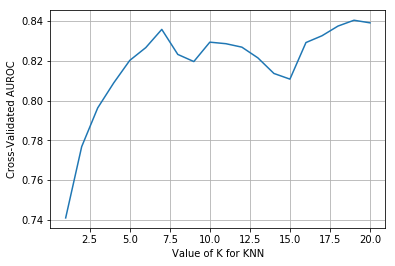

In [19]:
# ploting
plt.plot(k_range, k_scores)
plt.grid()
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated AUROC')

As we can see, the best value of K is 7. After 7, the score decreases due to under fitting.

In [20]:
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

**Predicting the Test set results**

In [21]:
# Predicting a new result
print(classifier.predict(sc.transform([[22, 75520]])))

[0]


In [22]:
# Predicting test set results
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]]


**Making the Confusion Matrix**

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[53  7]
 [13 19]]
